In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Stil ayarı
sns.set_theme(style="whitegrid", palette="Set2", font_scale=1.1)
df = pd.read_excel('./data/Customer_Churn_Data_Large.xlsx')

### Description Datasets
- CustomerID    - 
- Age           -
- Gender        -
- MaritalStatus -
- IncomeLevel   -

In [2]:
df

,CustomerID,Age,Gender,MaritalStatus,IncomeLevel
0,1,62,M,Single,Low
1,2,65,M,Married,Low
2,3,18,M,Single,Low
3,4,21,M,Widowed,Low
4,5,21,M,Divorced,Medium
...,...,...,...,...,...
995,996,54,F,Single,Low
996,997,19,M,Widowed,High
997,998,47,M,Married,Low
998,999,23,M,Widowed,High


### Null value check

In [3]:
df.isnull().sum()

CustomerID       0
Age              0
Gender           0
MaritalStatus    0
IncomeLevel      0
dtype: int64

### Add AgeGroup columns

In [4]:
df["AgeGroup"] = pd.cut(df["Age"], bins=[0, 18, 35, 50, 65, 100], labels=["<18", "18-35", "36-50", "51-65", "65+"])


In [5]:
df

,CustomerID,Age,Gender,MaritalStatus,IncomeLevel,AgeGroup
0,1,62,M,Single,Low,51-65
1,2,65,M,Married,Low,51-65
2,3,18,M,Single,Low,<18
3,4,21,M,Widowed,Low,18-35
4,5,21,M,Divorced,Medium,18-35
...,...,...,...,...,...,...
995,996,54,F,Single,Low,51-65
996,997,19,M,Widowed,High,18-35
997,998,47,M,Married,Low,36-50
998,999,23,M,Widowed,High,18-35


### Pivot tables

In [6]:
marital_agegroup = pd.crosstab(df["MaritalStatus"], df["AgeGroup"])
income_agegroup = pd.crosstab(df["IncomeLevel"], df["AgeGroup"])

print("\n--- MaritalStatus × AgeGroup ---\n", marital_agegroup)
print("\n--- IncomeLevel × AgeGroup ---\n", income_agegroup)


--- MaritalStatus × AgeGroup ---
 AgeGroup       <18  18-35  36-50  51-65  65+
MaritalStatus                               
Divorced         4     80     67     76   21
Married          8     84     76     67   26
Single           7     69     63     64   12
Widowed          5     93     77     76   25

--- IncomeLevel × AgeGroup ---
 AgeGroup     <18  18-35  36-50  51-65  65+
IncomeLevel                               
High           4    121     94    105   25
Low           10    105     98     86   26
Medium        10    100     91     92   33


### Age Distribution

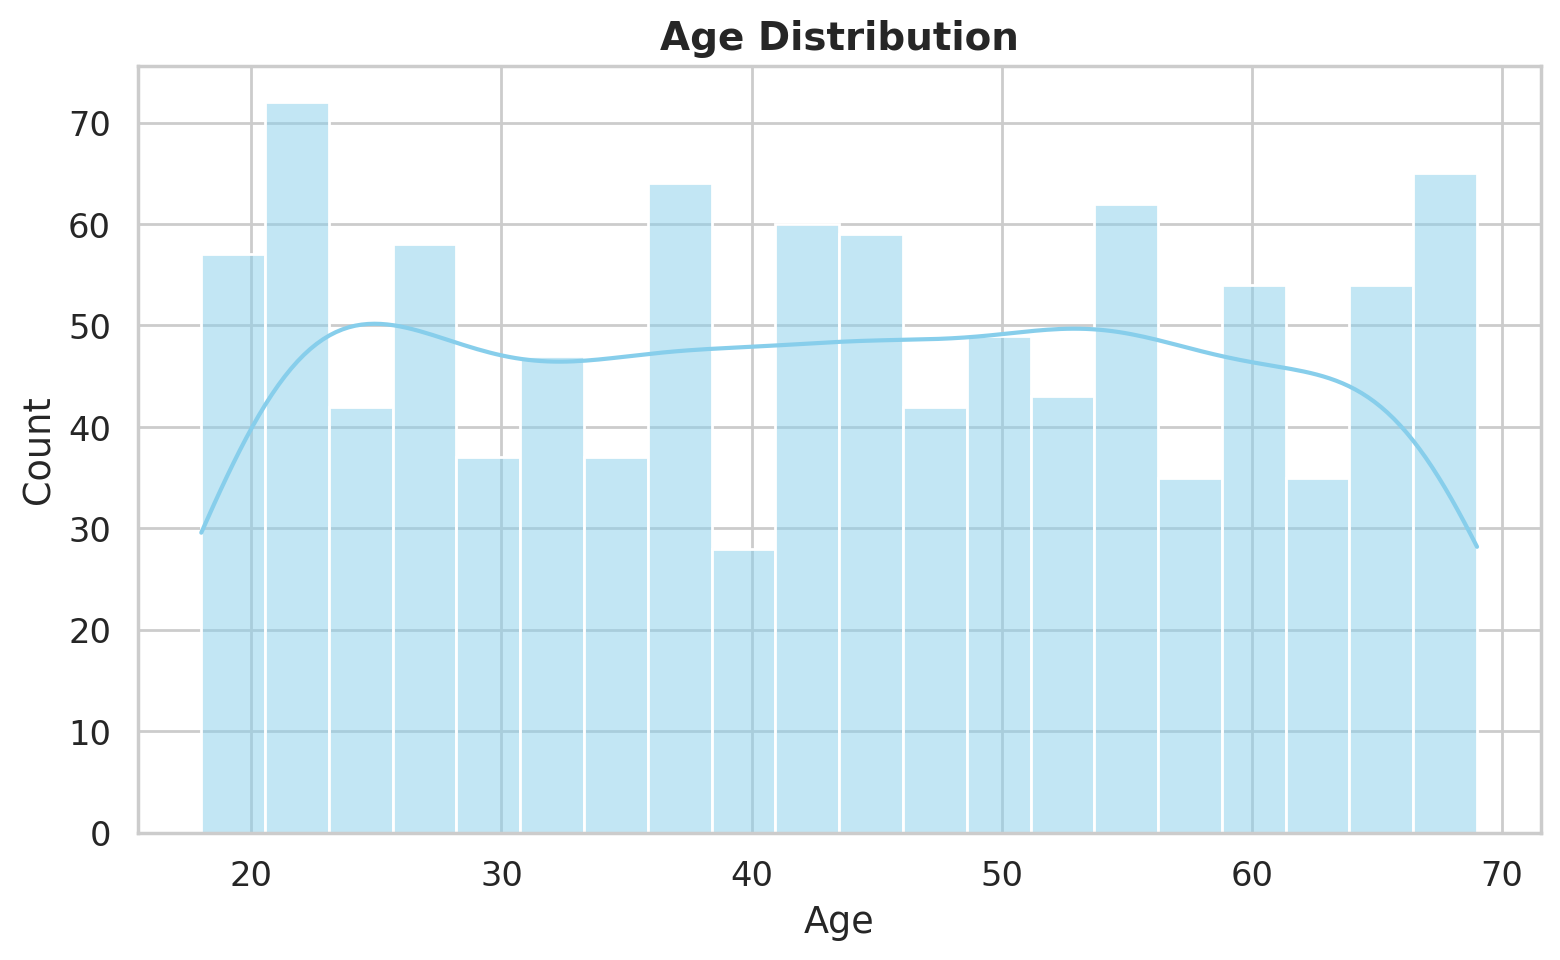

In [7]:
plt.figure(figsize=(8,5),dpi = 200)
sns.histplot(df["Age"], bins=20, kde=True, color="skyblue")
plt.title("Age Distribution", fontsize=14, weight="bold")
plt.xlabel("Age")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

<Axes: xlabel='Age', ylabel='Count'>

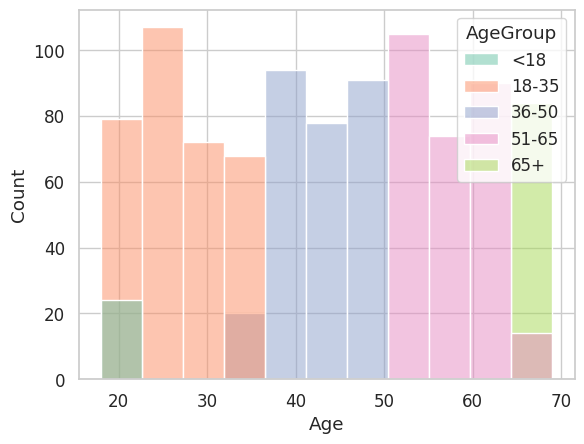

In [8]:
sns.histplot(data=df, x="Age", hue="AgeGroup")

### Gender Distribution

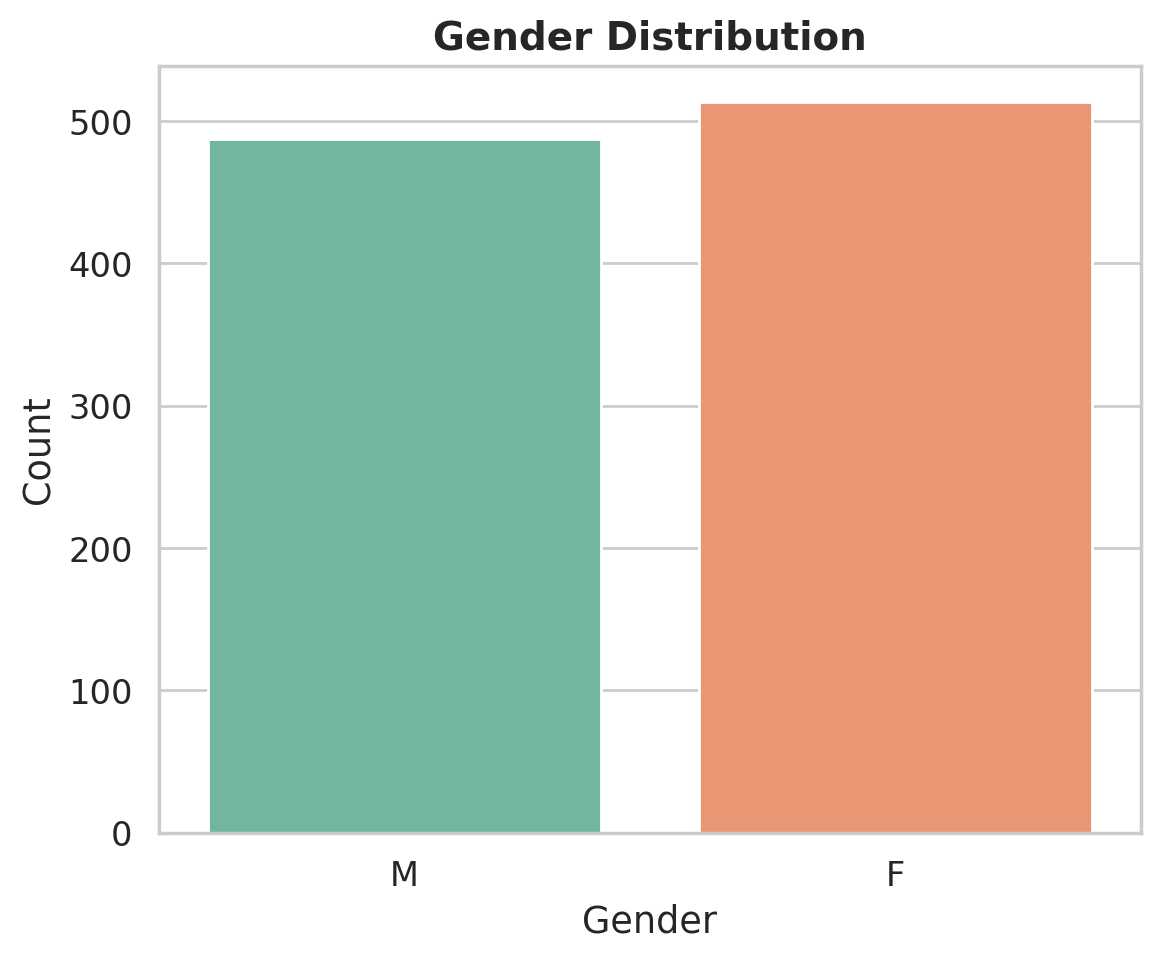

In [9]:
plt.figure(figsize=(6,5),dpi = 200)
sns.countplot(data=df, x="Gender", hue="Gender", dodge=False)
plt.title("Gender Distribution", fontsize=14, weight="bold")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

### MartialStatus AgeGroup

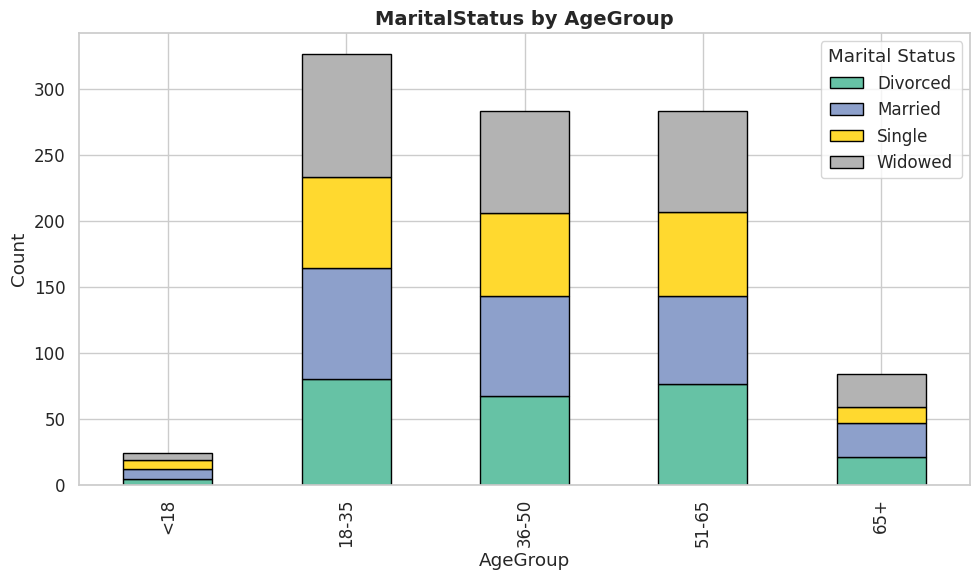

In [10]:
marital_agegroup.T.plot(
    kind="bar",
    stacked=True,
    figsize=(10,6),
    colormap="Set2",
    edgecolor="black"
)
plt.title("MaritalStatus by AgeGroup", fontsize=14, weight="bold")
plt.xlabel("AgeGroup")
plt.ylabel("Count")
plt.legend(title="Marital Status")
plt.tight_layout()
plt.show()

<Axes: xlabel='MaritalStatus', ylabel='Age'>

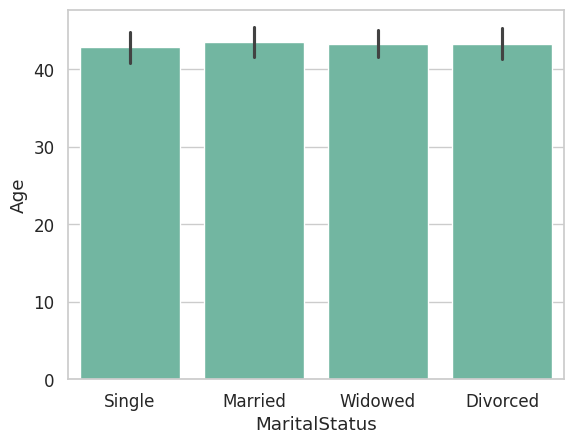

In [11]:
sns.barplot(data=df, x="MaritalStatus", y="Age")

### IncomeLevel AgeGroup(stacked bar plot)

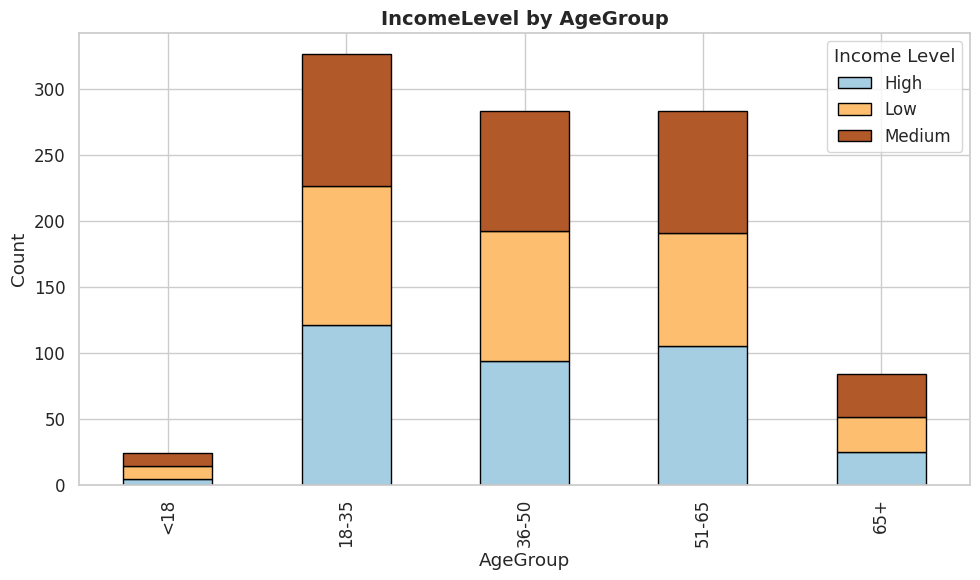

In [12]:
income_agegroup.T.plot(
    kind="bar",
    stacked=True,
    figsize=(10,6),
    colormap="Paired",
    edgecolor="black"
)
plt.title("IncomeLevel by AgeGroup", fontsize=14, weight="bold")
plt.xlabel("AgeGroup")
plt.ylabel("Count")
plt.legend(title="Income Level")
plt.tight_layout()
plt.show()

<Axes: xlabel='IncomeLevel', ylabel='Age'>

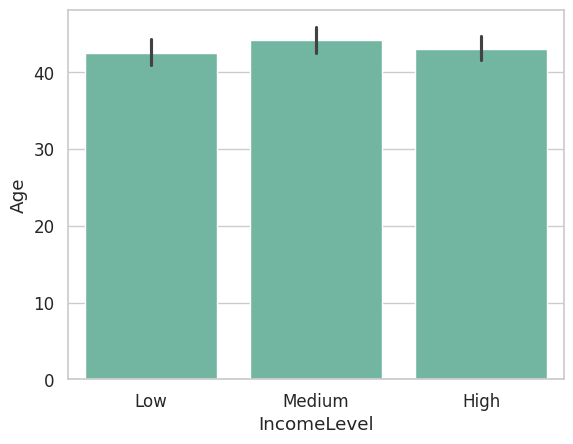

In [13]:
sns.barplot(data=df, x="IncomeLevel", y="Age")

### IncomeLevel AgeGroup(Heatmap)

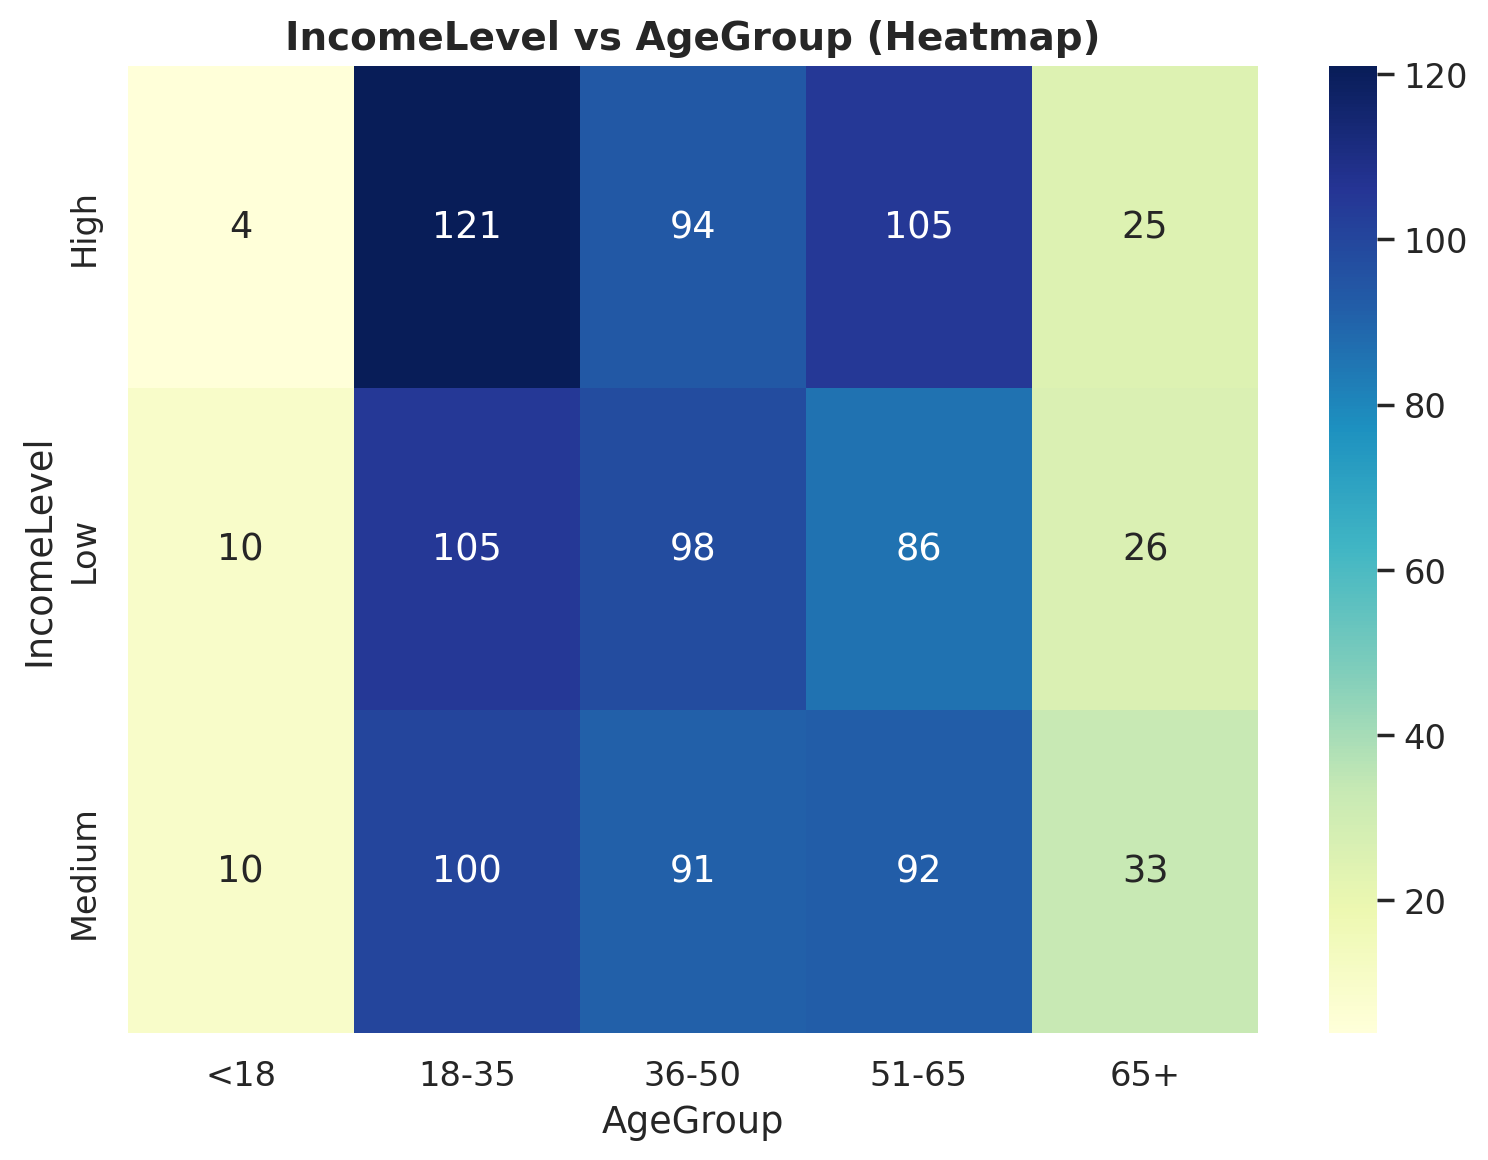

In [14]:
plt.figure(figsize=(8,6), dpi=200)
sns.heatmap(income_agegroup, annot=True, fmt="d", cmap="YlGnBu", cbar=True)
plt.title("IncomeLevel vs AgeGroup (Heatmap)", fontsize=14, weight="bold")
plt.xlabel("AgeGroup")
plt.ylabel("IncomeLevel")
plt.tight_layout()
plt.show()